# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.049751e+01     7.420356e+00
 * time: 0.004328012466430664
     1     2.643613e+01     5.126556e+00
 * time: 0.012669086456298828
     2     2.120282e+01     8.154627e+00
 * time: 0.033106088638305664
     3     1.302628e+01     1.940611e+00
 * time: 0.057646989822387695
     4     1.178910e+01     2.423788e+00
 * time: 0.07305288314819336
     5     1.128596e+01     1.594098e+00
 * time: 0.08829593658447266
     6     1.005041e+01     1.317594e+00
 * time: 0.10308194160461426
     7     9.414760e+00     1.373307e+00
 * time: 0.1181020736694336
     8     9.117632e+00     1.067333e+00
 * time: 0.13312792778015137
     9     8.970542e+00     7.267931e-01
 * time: 0.14825797080993652
    10     8.939334e+00     1.220487e+00
 * time: 0.15959596633911133
    11     8.860163e+00     6.282219e-01
 * time: 0.17091608047485352
    12     8.756425e+00     4.228258e-01
 * time: 0.18209099769592285
    13     8.688533e+00     4.024209e-01
 * ti

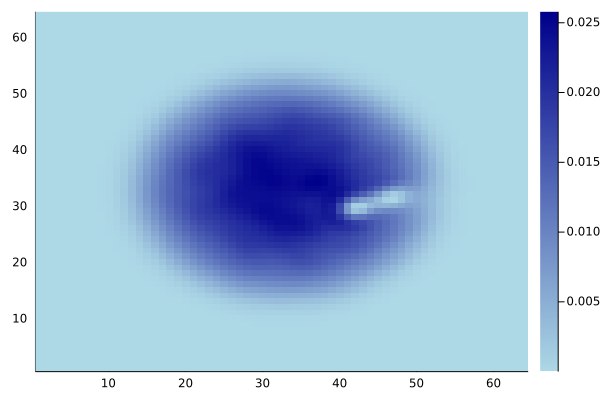

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)